In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import linalg as la

<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class '

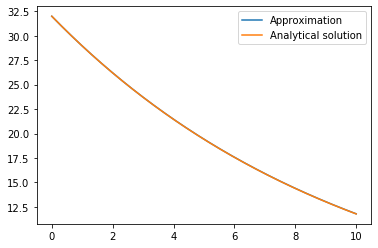

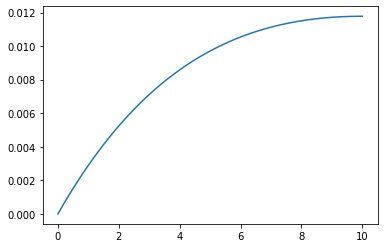

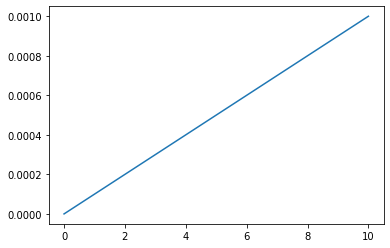

In [3]:
def LinTest(t,y):
    return -0.1*y

def LotVol(t,y):
    a = 3
    b = 9
    c = 15
    d = 15
    #y = np.array(y)
    xprim = a*y[0]-b*y[0]*y[1]
    yprim = c*y[0]*y[1]-d*y[1]
    return np.array([xprim,yprim])

def RK4step(f,told,uold,h):
    Y1 = f(told,uold)
    print(type(Y1))
    Y2 = f(told+h/2,uold+h*Y1/2)
    Y3 = f(told+h/2,uold+h*Y2/2)
    Y4 = f(told+h, uold+h*Y3)
    return uold + h/6*(Y1+2*Y2+2*Y3+Y4)

def RKsolver(f,y0,tf,t0,N):
    h = (tf-t0)/N              #step size
    t = np.linspace(t0,tf,N)   #setting grid
    uold = y0                  #first function value being y0
    plot = []
    for i in range(N):
        plot.append(uold)
        uold = RK4step(f,0,uold,h)
    return t,plot,uold

def facit(y0,t):
    facit = []
    for i in range(len(t)):
        facit.append(np.dot(la.expm([[-0.1*t[i]]]),y0)[0][0])
    return facit

y0  = 32
tf = 10
t0 = 0
N = 1000
x,y,final = RKsolver(LinTest,y0,tf,t0,N)
fa = facit(y0,x)

err = []
relerr =  []

for i in range(len(y)):    
    err.append(y[i]-fa[i])
    relerr.append(err[i]/y[i])

plt.plot(x,y,label = 'Approximation')
plt.plot(x,fa, label = 'Analytical solution')
plt.legend()
plt.show()
plt.plot(x,err)
plt.show()    
plt.plot(x,relerr)
plt.show()

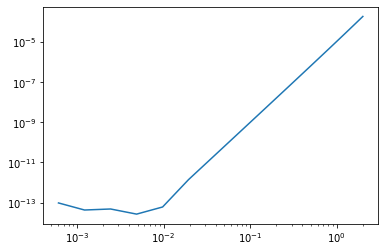

In [301]:
err_of_N = []
Ns = []
hs  = []
for i in range(15):
    Ns.append(4+2**i)
    hs.append((tf-t0)/Ns[i])
    x,y,final = RKsolver(LinTest,y0,tf,t0,Ns[i])
    err_of_N.append(final - np.dot(la.expm([[-0.1*x[-1]]]),y0)[0][0])

    
    
plt.plot(hs,err_of_N)
plt.loglog()
plt.show()

In [323]:
def RK34step(f,told,uold,h):
    u = np.array(uold)
    Y1 = f(told,uold)
    Y2 = f(told+h/2,u+h*Y1/2)
    Y3 = f(told+h/2,u+h*Y2/2)
    Z3 = f(told+h,u-h*Y1+2*h*Y2)
    Y4 = f(told+h, u+h*Y3)
    return u + h/6*(Y1+2*Y2+2*Y3+Y4), h/6*(2*Y2+Z3-2*Y3-Y4)

In [324]:
def newstep(tol,err,errold,hold,k):
    r = la.norm(err)
    rold = la.norm(errold)
    hnew = ((tol/r)**(2/(3*k)))*((tol/rold)**(-1/(3*k)))*hold
    #hnew = (tol/r)**(1/k)
    return hnew

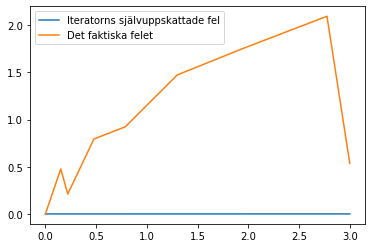

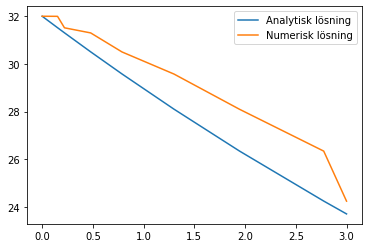

In [325]:
def adaptiveRK34(f,t0,tf,y0,tol):
    h = abs(tf-t0)*tol**(1/4)/(100*(1+la.norm(f(1,y0))))
    errold = tol
    k = 4
    told = t0
    uold = y0
    
    t = []
    plot = []
    approxerr = []
    
    while told < tf:
        t.append(told)
        plot.append(uold)
        
        uold, err = RK34step(f,told,uold,h)
        h = newstep(tol,err,errold,h,k)
        
        errold = err
        approxerr.append(la.norm(errold))
        if told + h > tf:
            h = tf - told
        told = told + h
    
    t.append(told)    
    approxerr.append(la.norm(errold))
    plot.append(uold)
    return t, plot, approxerr,


t, approx, approxerr  = adaptiveRK34(LinTest,t0,tf,y0,tol)

fac = facit(y0,t)
errarr = []
for i in range(len(fac)):
    errarr.append(la.norm(fac[i]-approx[i]))

plt.plot(t,approxerr, label = 'Iteratorns självuppskattade fel')
plt.plot(t,errarr, label = 'Det faktiska felet')

plt.legend()
plt.show()

plt.plot(t,fac,label = 'Analytisk lösning')
plt.plot(t,approx, label = 'Numerisk lösning')
plt.legend()
plt.show()

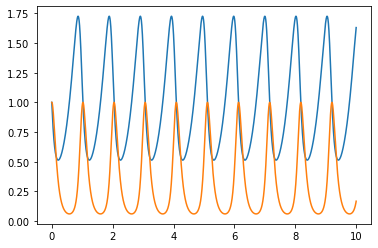

In [329]:
u0 = [1,1]
t0 = 0
tf = 10
tol = 1e-10
t, approx, approxerr  = adaptiveRK34(LotVol,t0,tf,u0,tol)
plt.plot(t,approx)